In [1]:
import numpy as np
import cv2
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import cifar10 # Using CIFAR-10 as a stand-in for VGG-10
from tensorflow.keras.utils import to_categorical

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()


170498071/170498071 [==============================] - 11s 0us/step


In [3]:
def color_histogram_features(images):
    features = []
    for image in images:
        image_uint8 = (image * 255).astype('uint8')  # Convert back to uint8
        hist = cv2.calcHist([image_uint8], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        features.append(hist.flatten())
    return np.array(features)

# Apply correction
color_features_train = color_histogram_features(x_train_normalized)
color_features_test = color_histogram_features(x_test_normalized)




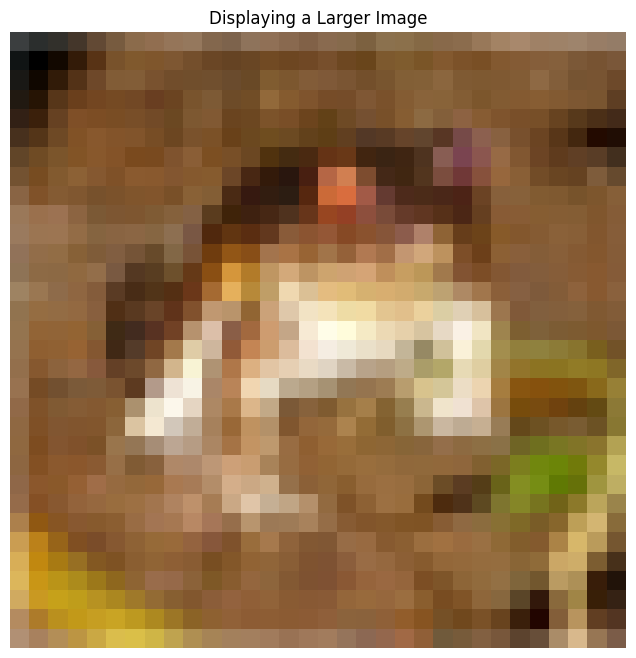

In [ ]:
import matplotlib.pyplot as plt

image = x_train[0]

plt.figure(figsize=(8, 8))  # Adjust figure size to your preference, (width, height) in inches
plt.imshow(image)
plt.title('Displaying a Larger Image')
plt.axis('off')
plt.show()


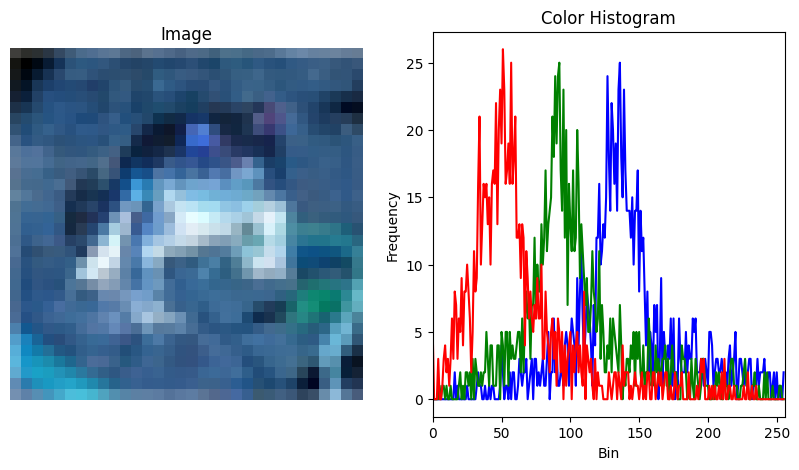

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image_and_histogram(image):

    if image.max() > 1 or image.min() < 0:
        raise ValueError("Image should be normalized to [0, 1].")

    # Convert the normalized image to uint8
    image_uint8 = (image * 255).astype('uint8')

    # Create the histogram for each color channel
    color = ('b', 'g', 'r')
    plt.figure(figsize=(10, 5))

    # Subplot for the image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB))
    plt.title('Image')
    plt.axis('off')

    # Subplot for the histogram
    plt.subplot(1, 2, 2)
    for i, col in enumerate(color):
        hist = cv2.calcHist([image_uint8], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])

    plt.title('Color Histogram')
    plt.xlabel('Bin')
    plt.ylabel('Frequency')

    plt.show()

# Example usage with the first image from your dataset
plot_image_and_histogram(x_train_normalized[0])


In [ ]:
def shape_features(images):
    features = []
    for image in images:
        image_uint8 = (image * 255).astype('uint8')  # Convert back to uint8
        gray = cv2.cvtColor(image_uint8, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        area = sum([cv2.contourArea(c) for c in contours])
        features.append([len(contours), area])
    return np.array(features)

# Apply correction
shape_features_train = shape_features(x_train_normalized)
shape_features_test = shape_features(x_test_normalized)


In [ ]:
def edge_features(images):
    features = []
    for image in images:
        image_uint8 = (image * 255).astype('uint8')  # Convert back to uint8
        gray = cv2.cvtColor(image_uint8, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 100, 200)
        features.append(edges.flatten())
    return np.array(features)

# Apply correction
edge_features_train = edge_features(x_train_normalized)
edge_features_test = edge_features(x_test_normalized)



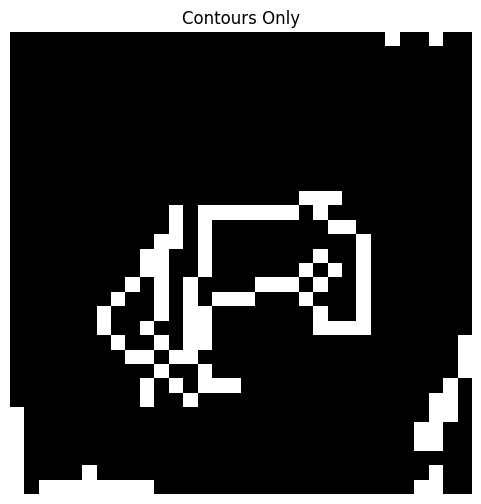

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_contours_only(image):
    """
    Plot the contours of an image on a blank canvas.

    Parameters:
    - image (np.array): A single image, normalized to [0, 1].
    """
    if image.max() > 1 or image.min() < 0:
        raise ValueError("Image should be normalized to [0, 1].")

    # Convert the normalized image to uint8
    image_uint8 = (image * 255).astype('uint8')

    # Convert to grayscale
    gray = cv2.cvtColor(image_uint8, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty black image to draw contours on
    contour_canvas = np.zeros_like(gray)

    # Draw contours in white
    cv2.drawContours(contour_canvas, contours, -1, (255), 1)  # Contours are drawn with white color and thickness of 1

    # Create the plot
    plt.figure(figsize=(6, 6))
    plt.imshow(contour_canvas, cmap='gray')
    plt.title('Contours Only')
    plt.axis('off')
    plt.show()

# Example usage with the first image from your dataset
plot_contours_only(x_train_normalized[0])


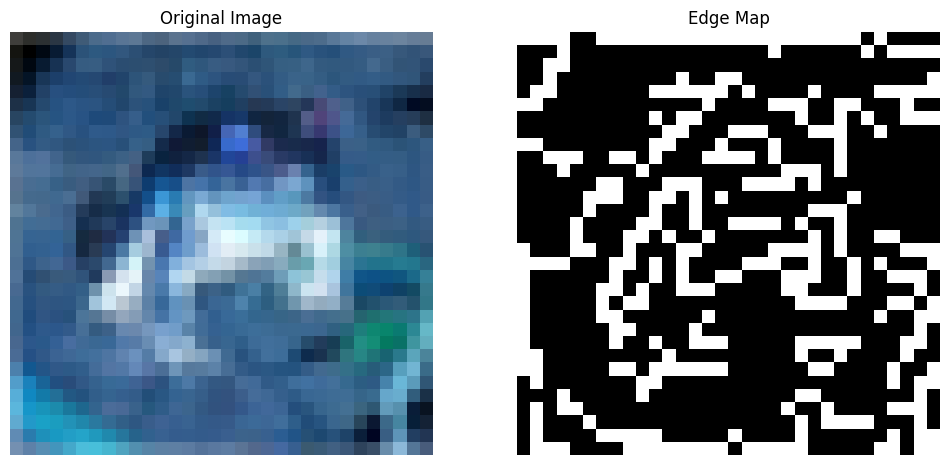

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image_and_edges(image):

    if image.max() > 1 or image.min() < 0:
        raise ValueError("Image should be normalized to [0, 1].")

    # Convert the normalized image to uint8
    image_uint8 = (image * 255).astype('uint8')

    # Convert to grayscale
    gray = cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB if len(image.shape) == 3 and image.shape[2] == 3 else cv2.COLOR_GRAY2RGB)

    # Apply Canny edge detector
    edges = cv2.Canny(gray, 100, 200)

    # Create the plots
    plt.figure(figsize=(12, 6))

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB))  # Converting BGR to RGB for correct color display
    plt.title('Original Image')
    plt.axis('off')

    # Plot the edges
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Map')
    plt.axis('off')

    plt.show()

# Example usage with the first image from your dataset
plot_image_and_edges(x_train_normalized[0])


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
#Implementing Pre-trained VGG16 Model to our CIFAR-10 Dataset

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load VGG16 pre-trained on ImageNet without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new classifier layers on top of VGG16 base
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)  # Assuming 10 classes

# Compile the new model
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare your data (x_train, x_test, y_train, y_test)
# Ensure images are resized to 32x32 pixels as VGG16 expects inputs of at least 32x32
# Ensure y_train and y_test are one-hot encoded
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

# Train the model
model.fit(x_train, y_train_encoded, batch_size=32, epochs=10, validation_data=(x_test, y_test_encoded))

# Evaluate the model
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_encoded, axis=1)
print(classification_report(true_classes, predicted_classes))

Epoch 1/10
1563/1563 [==============================] - 13s 6ms/step - loss: 4.4473 - accuracy: 0.4403 - val_loss: 2.9238 - val_accuracy: 0.4983
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2819 - accuracy: 0.5461 - val_loss: 2.4103 - val_accuracy: 0.5259
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6831 - accuracy: 0.5961 - val_loss: 2.1054 - val_accuracy: 0.5452
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3468 - accuracy: 0.6368 - val_loss: 2.0050 - val_accuracy: 0.5506
Epoch 5/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1161 - accuracy: 0.6731 - val_loss: 1.9124 - val_accuracy: 0.5558
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9471 - accuracy: 0.7085 - val_loss: 1.8489 - val_accuracy: 0.5706
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8189 - accuracy: 0.7351 - val_loss: 1.8091 - val_accuracy

In [ ]:
feature_sets = {
    'Color': (color_features_train, color_features_test),
    'Shape': (shape_features_train, shape_features_test),
    'Edge': (edge_features_train, edge_features_test),
}


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Concatenate
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

def create_multi_input_model(custom_feature_shape, num_classes=10, learning_rate=0.0001):
    # Load VGG16 without the top layer
    base_model = VGG16(weights="imagenet", include_top=False,
                       input_tensor=Input(shape=(224, 224, 3)))
    # Freeze the layers of VGG16
    for layer in base_model.layers:
        layer.trainable = False

    # Flatten the output of the base model
    flatten_vgg = Flatten()(base_model.output)

    # Custom features input
    custom_features_input = Input(shape=(custom_feature_shape,))

    # Combine VGG16 features with custom features
    combined_features = Concatenate()([flatten_vgg, custom_features_input])

    # Add fully connected layers
    x = Dense(512, activation="relu")(combined_features)
    x = Dense(num_classes, activation="softmax")(x)

    # Create the model
    model = Model(inputs=[base_model.input, custom_features_input], outputs=x)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Convert labels to categorical
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

# Create the model for color features
custom_feature_shape = color_features_train.shape[1]
model_color = create_multi_input_model(custom_feature_shape=custom_feature_shape, num_classes=10)


# Resize images to 224x224
x_train_resized = tf.image.resize(x_train, [224, 224])
x_test_resized = tf.image.resize(x_test, [224, 224])

# Now, x_train_resized and x_test_resized can be used for training and validation


# Train the model
model_color.fit([x_train_resized, color_features_train], y_train_encoded,
                validation_data=([x_test_resized, color_features_test], y_test_encoded),
                epochs=10, batch_size=128)


Epoch 1/10
1563/1563 [==============================] - 83s 51ms/step - loss: 0.8804 - accuracy: 0.7643 - val_loss: 0.5642 - val_accuracy: 0.8155
Epoch 2/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.2162 - accuracy: 0.9257 - val_loss: 0.5703 - val_accuracy: 0.8278
Epoch 3/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.0876 - accuracy: 0.9713 - val_loss: 0.6638 - val_accuracy: 0.8339
Epoch 4/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.0625 - accuracy: 0.9790 - val_loss: 0.7715 - val_accuracy: 0.8341
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.0514 - accuracy: 0.9828 - val_loss: 0.7679 - val_accuracy: 0.8383
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.9095 - val_accuracy: 0.8361
Epoch 7/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.0366 - accuracy: 0.9882 - val_loss: 1.0496 -

In [ ]:
#Evaluate the Model
predictions = model_color.predict([x_test_resized, color_features_test])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_encoded, axis=1)

# Print classification report
print(f"Results for Color Features")
print(classification_report(true_classes, predicted_classes))

313/313 [==============================] - 12s 39ms/step
Results for Color Features
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1000
           1       0.89      0.95      0.92      1000
           2       0.82      0.78      0.80      1000
           3       0.68      0.68      0.68      1000
           4       0.84      0.78      0.81      1000
           5       0.81      0.70      0.75      1000
           6       0.78      0.92      0.85      1000
           7       0.90      0.86      0.88      1000
           8       0.92      0.90      0.91      1000
           9       0.89      0.93      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [ ]:
feature_sets = {
    'Shape': ( shape_features_train, shape_features_test),
    'Edge': ( edge_features_train, edge_features_test),
}

In [ ]:
# Loop through each feature set
for feature_name, (features_train, features_test) in feature_sets.items():
    print(f"Training with {feature_name} Features")

    # Calculate custom feature shape dynamically
    custom_feature_shape = features_train.shape[1]

    # Create the model
    model = create_multi_input_model(custom_feature_shape=custom_feature_shape, num_classes=10)

    # Train the model
    history = model.fit([x_train_resized, features_train], y_train_encoded,
                        validation_data=([x_test_resized, features_test], y_test_encoded),
                        epochs=10, batch_size=128)

    # Evaluate the model
    predictions = model.predict([x_test_resized, features_test])
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test_encoded, axis=1)

    # Print classification report
    print(f"Results for {feature_name} Features")
    print(classification_report(true_classes, predicted_classes))


Training with Shape Features
Epoch 1/10
1563/1563 [==============================] - 80s 50ms/step - loss: 0.9326 - accuracy: 0.7615 - val_loss: 0.5655 - val_accuracy: 0.8147
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.2312 - accuracy: 0.9203 - val_loss: 0.5790 - val_accuracy: 0.8293
Epoch 3/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.0997 - accuracy: 0.9670 - val_loss: 0.6778 - val_accuracy: 0.8326
Epoch 4/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.0644 - accuracy: 0.9797 - val_loss: 0.8380 - val_accuracy: 0.8212
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.0623 - accuracy: 0.9797 - val_loss: 0.8663 - val_accuracy: 0.8292
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.0447 - accuracy: 0.9851 - val_loss: 0.9401 - val_accuracy: 0.8365
Epoch 7/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.0414 - accuracy

# **Model Architecture Graph**

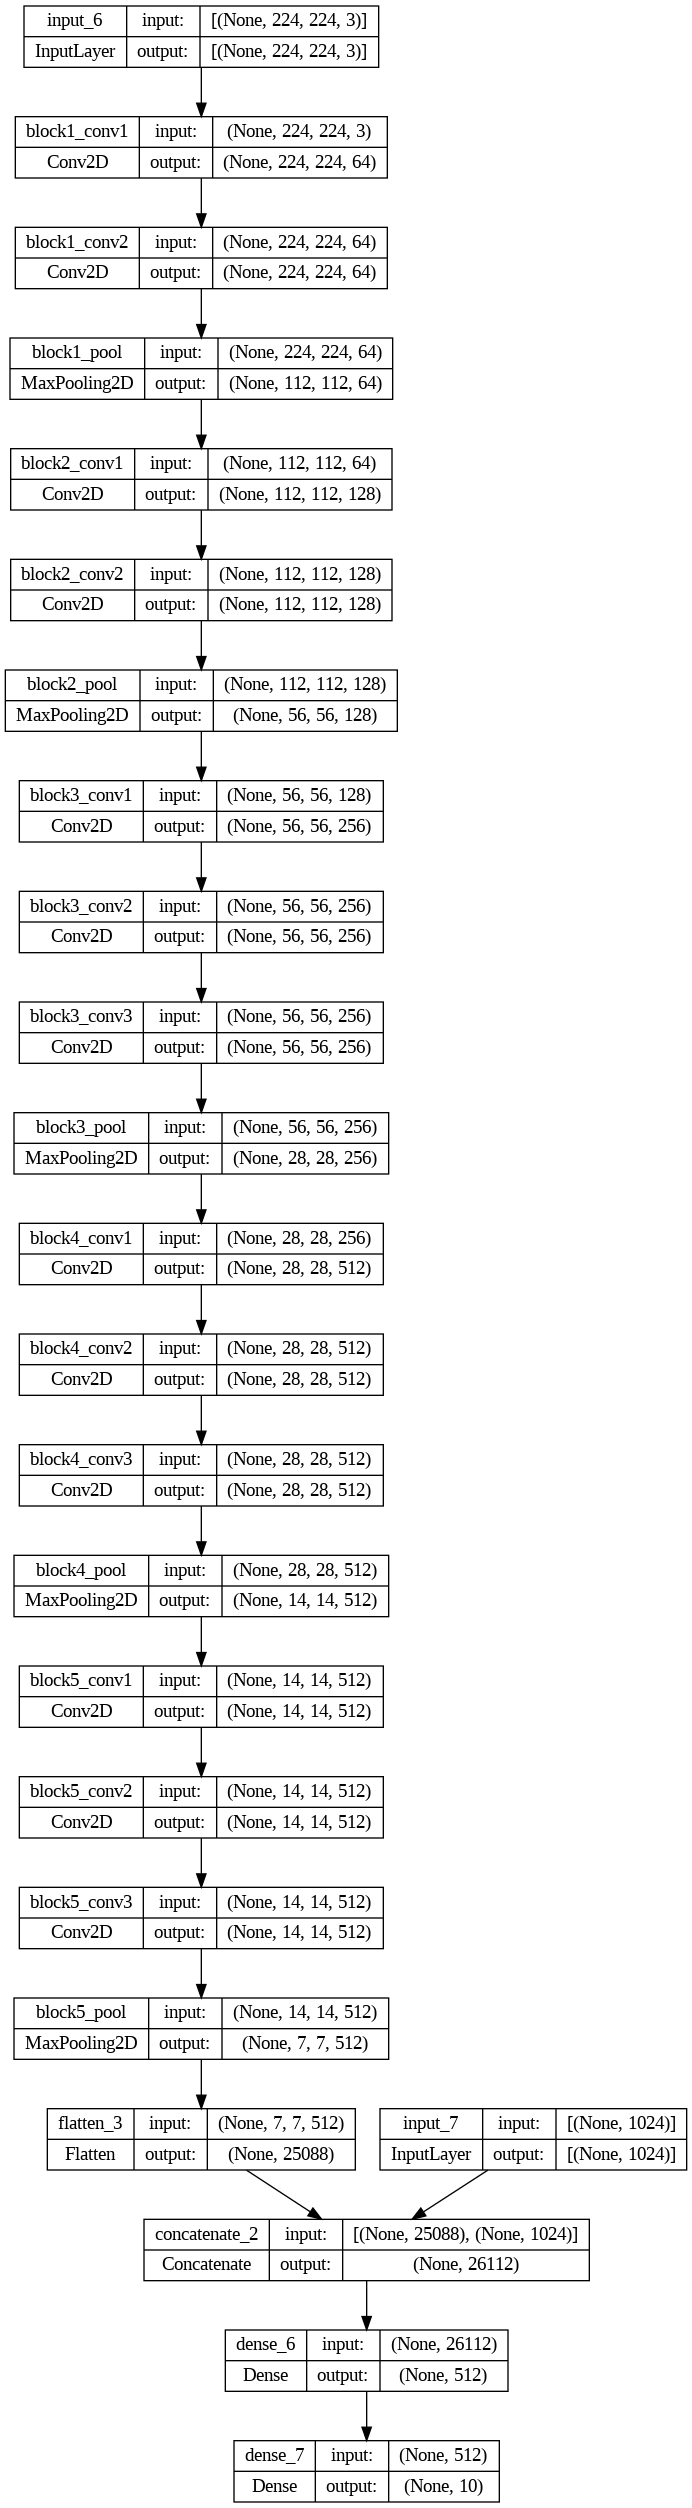

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your constructed multi-input model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


# **Inception V3**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Load InceptionV3 pre-trained on ImageNet without the top classification layer
input_shape = (75, 75, 3)  # Set the input shape to 75x75x3
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new classifier layers on top of InceptionV3 base
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)  # Assuming 10 classes

# Compile the new model
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare and resize your data (x_train, x_test, y_train, y_test)
x_train_resized = tf.image.resize(x_train, (75, 75))
x_test_resized = tf.image.resize(x_test, (75, 75))
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

# Train the model
model.fit(x_train_resized, y_train_encoded, batch_size=128, epochs=10, validation_data=(x_test_resized, y_test_encoded))

# Evaluate the model
predictions = model.predict(x_test_resized)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_encoded, axis=1)
print(classification_report(true_classes, predicted_classes))



Epoch 1/10
1563/1563 [==============================] - 29s 15ms/step - loss: 10.1461 - accuracy: 0.2253 - val_loss: 7.9745 - val_accuracy: 0.2574
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 5.7753 - accuracy: 0.2623 - val_loss: 5.0853 - val_accuracy: 0.2793
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 4.6308 - accuracy: 0.2803 - val_loss: 4.7189 - val_accuracy: 0.2732
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 4.0537 - accuracy: 0.2919 - val_loss: 4.9953 - val_accuracy: 0.2677
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 3.7508 - accuracy: 0.3016 - val_loss: 3.4665 - val_accuracy: 0.2935
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 3.4717 - accuracy: 0.3115 - val_loss: 3.3295 - val_accuracy: 0.3078
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 3.2662 - accuracy: 0.3149 - val_loss: 4.1347 

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Load a pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(299, 299, 3)))  # InceptionV3 expects 299x299 images

# Add custom layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)

# Assume you have a feature set for your custom DSP features
custom_features_input = Input(shape=(custom_feature_shape,))
combined_features = Concatenate()([x, custom_features_input])

# Continue adding layers as needed
predictions = Dense(10, activation='softmax')(combined_features)

model2 = Model(inputs=[base_model.input, custom_features_input], outputs=predictions)

# Compile, train, and evaluate the model as shown in the previous examples

In [ ]:
# Loop through each feature set
for feature_name, (features_train, features_test) in feature_sets.items():
    print(f"Training with {feature_name} Features")

    # Calculate custom feature shape dynamically
    custom_feature_shape = features_train.shape[1]

    # Create the model
    model2 = create_multi_input_model(custom_feature_shape=custom_feature_shape, num_classes=10)

    # Train the model
    history = model2.fit([x_train_resized, features_train], y_train_encoded,
                        validation_data=([x_test_resized, features_test], y_test_encoded),
                        epochs=10, batch_size=128)

    # Evaluate the model
    predictions = model2.predict([x_test_resized, features_test])
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test_encoded, axis=1)

    # Print classification report
    print(f"Results for {feature_name} Features")
    print(classification_report(true_classes, predicted_classes))

Training with Shape Features
Epoch 1/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9601 - accuracy: 0.7597 - val_loss: 0.5714 - val_accuracy: 0.8137
Epoch 2/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.2304 - accuracy: 0.9219 - val_loss: 0.6884 - val_accuracy: 0.8135
Epoch 3/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.0971 - accuracy: 0.9676 - val_loss: 0.7440 - val_accuracy: 0.8278
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.0737 - accuracy: 0.9758 - val_loss: 0.8427 - val_accuracy: 0.8274
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.0617 - accuracy: 0.9791 - val_loss: 0.9227 - val_accuracy: 0.8270
Epoch 6/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.0462 - accuracy: 0.9848 - val_loss: 0.9583 - val_accuracy: 0.8312
Epoch 7/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.0377 - accuracy

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Concatenate
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

def create_multi_input_model(custom_feature_shape, num_classes=10, learning_rate=0.0001):
    # Load VGG16 without the top layer
    base_model = InceptionV3(weights="imagenet", include_top=False,
                       input_tensor=Input(shape=(224, 224, 3)))
    # Freeze the layers of VGG16
    for layer in base_model.layers:
        layer.trainable = False

    # Flatten the output of the base model
    flatten_vgg = Flatten()(base_model.output)

    # Custom features input
    custom_features_input = Input(shape=(custom_feature_shape,))

    # Combine VGG16 features with custom features
    combined_features = Concatenate()([flatten_vgg, custom_features_input])

    # Add fully connected layers
    x = Dense(512, activation="relu")(combined_features)
    x = Dense(num_classes, activation="softmax")(x)

    # Create the model
    model = Model(inputs=[base_model.input, custom_features_input], outputs=x)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Assuming you have: x_train_images, x_train_color_features, y_train
# And for testing: x_test_images, x_test_color_features, y_test
# Where x_train_images and x_test_images are resized to 299x299

# Convert labels to categorical
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

# Create the model for color features
custom_feature_shape = color_features_train.shape[1]
model_color = create_multi_input_model(custom_feature_shape=custom_feature_shape, num_classes=10)


# Resize images to 299x299
x_train_resized = tf.image.resize(x_train, [224, 224])
x_test_resized = tf.image.resize(x_test, [224, 224])

# Now, x_train_resized and x_test_resized can be used for training and validation


# Train the model
model_color.fit([x_train_resized, color_features_train], y_train_encoded,
                validation_data=([x_test_resized, color_features_test], y_test_encoded),
                epochs=128, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 72s 41ms/step - loss: 3.8819 - accuracy: 0.1847 - val_loss: 2.1505 - val_accuracy: 0.2016
Epoch 2/10
1563/1563 [==============================] - 62s 39ms/step - loss: 2.1478 - accuracy: 0.1997 - val_loss: 2.1361 - val_accuracy: 0.2282
Epoch 3/10
1563/1563 [==============================] - 62s 39ms/step - loss: 2.1166 - accuracy: 0.1872 - val_loss: 2.1339 - val_accuracy: 0.1743
Epoch 4/10
1563/1563 [==============================] - 62s 39ms/step - loss: 2.0824 - accuracy: 0.1862 - val_loss: 2.0577 - val_accuracy: 0.1909
Epoch 5/10
1563/1563 [==============================] - 62s 39ms/step - loss: 2.0340 - accuracy: 0.1937 - val_loss: 2.0306 - val_accuracy: 0.1925
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 2.0041 - accuracy: 0.1953 - val_loss: 2.0896 - val_accuracy: 0.1736
Epoch 7/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.9824 - accuracy: 0.1979 - val_loss: 1.9936 -

In [ ]:
#Evaluate the Model
predictions = model_color.predict([x_test_resized, color_features_test])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_encoded, axis=1)

# Print classification report
print(f"Results for Color Features")
print(classification_report(true_classes, predicted_classes))

313/313 [==============================] - 10s 29ms/step
Results for Color Features
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.22      0.22      0.22      1000
           2       0.10      0.03      0.05      1000
           3       0.00      0.00      0.00      1000
           4       0.11      0.02      0.03      1000
           5       0.17      0.86      0.28      1000
           6       0.50      0.00      0.00      1000
           7       0.14      0.01      0.03      1000
           8       0.31      0.75      0.44      1000
           9       0.19      0.17      0.18      1000

    accuracy                           0.21     10000
   macro avg       0.17      0.21      0.12     10000
weighted avg       0.17      0.21      0.12     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
